#Practical 6: Image Classification using Multilayer Feed Forward Neural Network on the CIFAR-10 Dataset



##Name: Snehal Rakas
##Roll No. : 12

##Problem Statement:
Develop a Multilayer Feed Forward Neural Network (MLP) to classify images from the CIFAR-10 dataset into 10 different categories. The goal is to preprocess the dataset, build an MLP model, train it on CIFAR-10, and evaluate its performance.

##Description:
The CIFAR-10 dataset consists of 60,000 color images of 32x32 pixels belonging to 10 classes, with 6,000 images per class. The dataset is divided into 50,000 training and 10,000 testing images. The classes include:

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck
Unlike Convolutional Neural Networks (CNNs), which are more suited for image classification, this practical explores how a Multilayer Feed Forward Neural Network (MLP) can be used to classify CIFAR-10 images. Since MLPs primarily work with 1D input vectors, the 3D image data needs to be flattened before being passed into the network.

##Installing TensorFlow 2.x


In [ ]:
#verify the installation
import tensorflow as tf
from tensorflow import keras

#Check tf.keras version
print(tf.__version__)

2.18.0


##Preparing the Data

###Loading the Data

In [ ]:
from keras.datasets import cifar10

# Loading CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


##Data Processing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Reshape the images into a 1D vector of 3072 (32x32x3)
RESHAPED = 32 * 32 * 3  # 3072 neurons per input
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)

# Convert data type to float32 for 32-bit precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize pixel values to range [0,1]
X_train /= 255.0
X_test /= 255.0

# Print dataset shape
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

# One-hot encode the labels (10 classes)
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)



(50000, 3072) train samples
(10000, 3072) test samples


##Designing the Model

###Preparing the Model 0: Single layer Perceptron

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()

In [ ]:
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model_0 = Sequential()

# Input layer with 3072 neurons and output layer with 10 neurons (one for each class)
model_0.add(Dense(10, input_shape=(3072,), name='dense_layer', activation='softmax'))


In [ ]:
# Compiling the model.
model_0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=40, validation_split=0.2)

Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4245 - loss: 1.6812 - val_accuracy: 0.3943 - val_loss: 1.7540
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4282 - loss: 1.6794 - val_accuracy: 0.3976 - val_loss: 1.7526
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4254 - loss: 1.6779 - val_accuracy: 0.3734 - val_loss: 1.7916
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4201 - loss: 1.6767 - val_accuracy: 0.3904 - val_loss: 1.7680
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4251 - loss: 1.6691 - val_accuracy: 0.3945 - val_loss: 1.7739
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4265 - loss: 1.6657 - val_accuracy: 0.3988 - val_loss: 1.7497
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4231 - loss: 1.6828 - val_accuracy: 0.3902 - val_loss: 1.7672
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4266 - loss: 1.6732 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


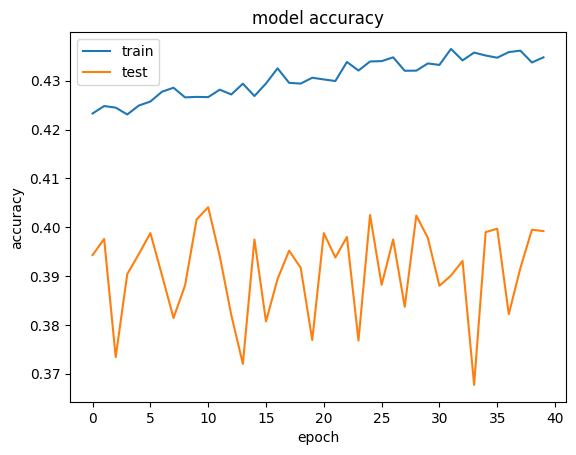

In [ ]:

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Accuracy Graph Analysis: The model shows overfitting as training accuracy improves while test accuracy fluctuates and remains low.

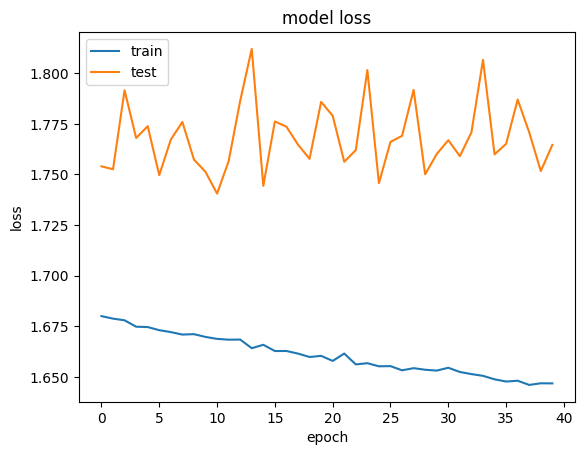

In [ ]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss Graph Analysis: The decreasing training loss and highly fluctuating test loss indicate poor generalization and overfitting.

In [ ]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3954 - loss: 1.7441
Test accuracy: 0.3935999870300293


In [ ]:
model_0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 10)                  │          30,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,732 (120.05 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model_1 = tf.keras.Sequential()

N_hidden = 64  # Number of neurons in hidden layers

# Input layer with 3072 neurons (32x32x3 flattened)
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(3072,), activation='relu'))

# Second hidden layer with 64 neurons
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))

# Output layer with 10 neurons (one per CIFAR-10 class)
model_1.add(Dense(10, name='dense_layer_3', activation='softmax'))


In [ ]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2214 - loss: 2.1189 - val_accuracy: 0.3240 - val_loss: 1.8782
Epoch 2/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3436 - loss: 1.8484 - val_accuracy: 0.3616 - val_loss: 1.8008
Epoch 3/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3767 - loss: 1.7638 - val_accuracy: 0.3583 - val_loss: 1.7825
Epoch 4/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3944 - loss: 1.7116 - val_accuracy: 0.3909 - val_loss: 1.7219
Epoch 5/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4069 - loss: 1.6803 - val_accuracy: 0.4119 - val_loss: 1.6694
Epoch 6/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4250 - loss: 1.6365 - val_accuracy: 0.4033 - val_loss: 1.6743
Epoch 7/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4323 - loss: 1.6090 - val_accuracy: 0.4246 - val_loss: 1.6265
Epoch 8/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4381 - loss: 1.5861 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


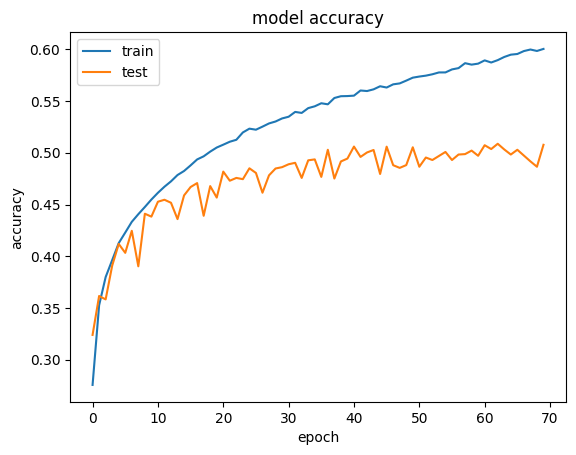

In [ ]:
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The training accuracy steadily improves, but the test accuracy plateaus and lags behind, indicating overfitting.

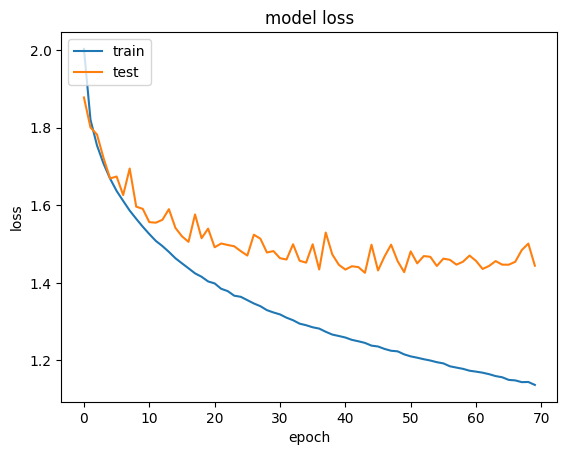

In [ ]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The training loss decreases consistently, but the test loss remains higher and fluctuates, further confirming overfitting and poor generalization to unseen data.




In [ ]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5109 - loss: 1.4123
Test accuracy: 0.5080999732017517


In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,484 (787.05 KB)

 Trainable params: 201,482 (787.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_1.weights

[<Variable path=sequential_2/dense_layer/kernel, shape=(3072, 64), dtype=float32, value=[[ 0.01594593  0.01193617 -0.08040797 ...  0.0224245  -0.0059565
    0.04996178]
  [ 0.02002956  0.01110909 -0.03176833 ...  0.03223304  0.0727962
    0.08352967]
  [-0.07181855  0.0736276  -0.03288922 ...  0.13031602 -0.02779365
    0.02557991]
  ...
  [-0.03179296 -0.04680353 -0.01963775 ...  0.00666484  0.00553282
    0.00604997]
  [-0.03247838  0.00029819 -0.03450637 ... -0.06062145  0.06669091
    0.03986798]
  [-0.03456324  0.02891949 -0.06670802 ... -0.01852713  0.00136387
    0.08238406]]>,
 <Variable path=sequential_2/dense_layer/bias, shape=(64,), dtype=float32, value=[ 2.42729545e-01 -2.38123000e-01  3.76692321e-03  2.54052669e-01
  -1.11570656e-01 -1.88400716e-01  6.43074811e-02  2.64782846e-01
   2.65143625e-02 -1.34911807e-03  1.21545613e-01 -4.66287732e-02
   1.44350564e-03 -8.16351846e-02 -2.42672205e-01  9.41300206e-03
  -3.18759761e-04  1.61658406e-01 -2.67525762e-02 -5.07787541e-0

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128

# Correct the input shape to match the flattened CIFAR-10 images (3072 features)
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(3072,), activation = 'relu'))
model_2.add(Dropout(0.3))

# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1843 - loss: 2.1992 - val_accuracy: 0.3124 - val_loss: 1.9464
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2828 - loss: 1.9747 - val_accuracy: 0.3434 - val_loss: 1.8507
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3126 - loss: 1.8933 - val_accuracy: 0.3542 - val_loss: 1.8162
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3338 - loss: 1.8512 - val_accuracy: 0.3721 - val_loss: 1.7736
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3464 - loss: 1.8258 - val_accuracy: 0.3861 - val_loss: 1.7423
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3585 - loss: 1.7926 - val_accuracy: 0.3957 - val_loss: 1.7235
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3700 - loss: 1.7685 - val_accuracy: 0.4088 - val_loss: 1.6985
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3783 - loss: 1.7512 - val_accuracy: 0.

In [ ]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,148 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.weights

[<Variable path=sequential_4/dense_layer/kernel, shape=(3072, 128), dtype=float32, value=[[-0.0323518  -0.03614663 -0.02262398 ... -0.00483409 -0.03028602
   -0.02150639]
  [ 0.04888869 -0.00901051  0.01677116 ... -0.01195976 -0.04682057
   -0.08402113]
  [ 0.06894622 -0.01671764  0.04080874 ...  0.0436869   0.01102113
   -0.10366745]
  ...
  [ 0.05669051 -0.03320679  0.05058445 ...  0.02535208  0.03661872
   -0.0032519 ]
  [-0.0363129  -0.01454689 -0.03818837 ... -0.00327409  0.00462861
   -0.00065382]
  [ 0.04689998 -0.00714606 -0.02460045 ... -0.03558267  0.00150968
   -0.03257225]]>,
 <Variable path=sequential_4/dense_layer/bias, shape=(128,), dtype=float32, value=[ 2.63337586e-02 -1.97629910e-02  4.60160710e-03 -1.46435753e-01
  -6.12262636e-02  6.97766012e-03  2.11402282e-01 -1.65742382e-01
  -1.61592336e-03 -1.74127221e-01 -1.56535767e-03 -6.62465021e-02
  -2.71529645e-01  8.26324336e-03 -3.39908391e-01 -4.41687591e-02
   1.12157658e-01 -3.90318520e-02  5.48484495e-05 -2.6017768

In [ ]:
model_2.get_config()

{'name': 'sequential_4',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 3072),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_4'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kern

###Improved Model 3: Changing the Optimizer - Adam

In [ ]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64

# Change input_shape to (3072,) to match CIFAR-10 image shape
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(3072,), activation = 'relu'))

# Now the model will take as input arrays of shape (*, 3072)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model.
model_3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1376 - loss: 2.2532 - val_accuracy: 0.2142 - val_loss: 2.0673
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1853 - loss: 2.1102 - val_accuracy: 0.2244 - val_loss: 2.0186
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1934 - loss: 2.0806 - val_accuracy: 0.2546 - val_loss: 1.9818
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2026 - loss: 2.0601 - val_accuracy: 0.2532 - val_loss: 1.9780
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2004 - loss: 2.0691 - val_accuracy: 0.2556 - val_loss: 1.9691
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2025 - loss: 2.0640 - val_accuracy: 0.2334 - val_loss: 2.0047
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2085 - loss: 2.0511 - val_accuracy: 0.2533 - val_loss: 1.9904
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2129 - loss: 2.0450 - val_accuracy:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


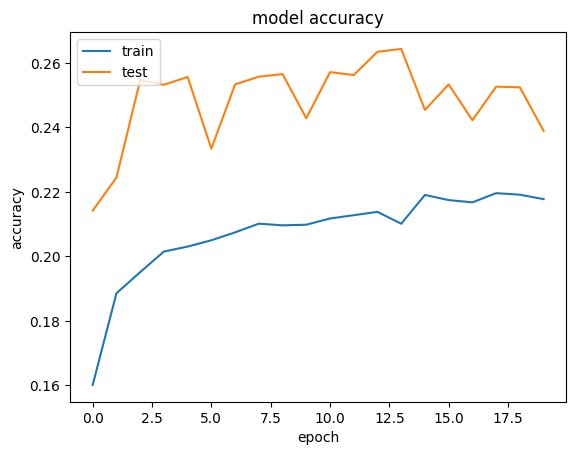

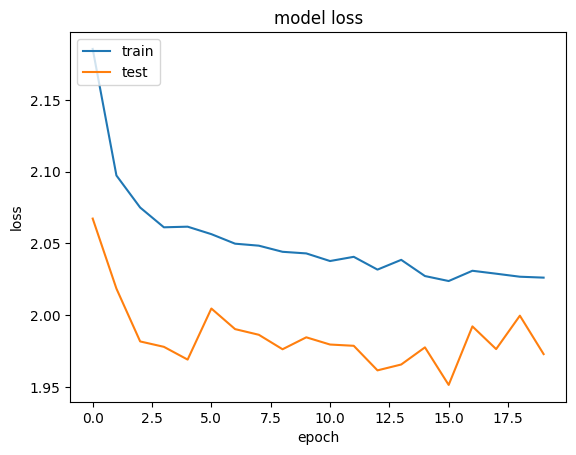

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1.First Set of Images:
Accuracy Graph: The training accuracy improves steadily, while the test accuracy fluctuates, indicating potential overfitting.
Loss Graph: The training loss decreases consistently, but the validation loss remains higher and fluctuates, further suggesting overfitting.

2.Second Set of Images:
Accuracy Graph: Validation accuracy is higher than training accuracy, which might indicate underfitting or data leakage.
Loss Graph: Both training and validation loss decrease but remain close, implying the model may not be learning complex patterns well.


In [ ]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2349 - loss: 1.9648
Test accuracy: 0.23229999840259552


In [ ]:
model_3.summary

<bound method Model.summary of <Sequential name=sequential_7, built=True>>

In [ ]:
model_3.weights

[<Variable path=sequential_7/dense_layer/kernel, shape=(3072, 64), dtype=float32, value=[[ 0.00732611  0.0013504   0.03446994 ...  0.01633651  0.00371626
   -0.0255663 ]
  [-0.00637084  0.03373248  0.00822117 ...  0.00417991 -0.02230811
    0.01564049]
  [-0.03051765 -0.02904163  0.01399644 ... -0.03853353 -0.03272516
    0.03074162]
  ...
  [-0.03171764  0.01837103 -0.00264232 ...  0.02233098 -0.02037484
    0.02658968]
  [ 0.03401923 -0.00205057 -0.03768148 ... -0.01787616 -0.03941037
    0.02529074]
  [-0.01354682  0.01583253  0.006826   ...  0.00093104 -0.01385533
    0.03518738]]>,
 <Variable path=sequential_7/dense_layer/bias, shape=(64,), dtype=float32, value=[-5.5221138e-03 -3.2054277e-03 -5.5505279e-03  1.6261137e-04
  -4.9173292e-03 -6.5487260e-03 -7.3249461e-03  1.3762862e-02
  -6.0045784e-03 -3.1425652e-01 -5.9984955e-03 -7.6122903e-03
  -5.8674398e-03 -4.9191448e-03  4.2963768e-03 -6.0034492e-03
  -5.2147792e-03 -6.7801462e-03 -5.2246139e-03 -6.0043330e-03
  -5.4779984e-03

In [ ]:
model_3.get_config()

{'name': 'sequential_7',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 3072),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_7'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kerne

###Improved Model 4: Increasing the number of Hidden Layer neuron

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
# Change input_shape to (3072,) to match the flattened CIFAR-10 image shape
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(3072,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 3072)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)


Epoch 1/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.2075 - loss: 2.2014 - val_accuracy: 0.3127 - val_loss: 1.8849
Epoch 2/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.2963 - loss: 1.9156 - val_accuracy: 0.3136 - val_loss: 1.8483
Epoch 3/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3075 - loss: 1.8754 - val_accuracy: 0.3600 - val_loss: 1.7986
Epoch 4/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3154 - loss: 1.8530 - val_accuracy: 0.3643 - val_loss: 1.7882
Epoch 5/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.3204 - loss: 1.8378 - val_accuracy: 0.3833 - val_loss: 1.7666
Epoch 6/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.3385 - loss: 1.8073 - val_accuracy: 0.3857 - val_loss: 1.7656
Epoch 7/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.3414 - loss: 1.8059 - val_accuracy: 0.3854 - val_loss: 1.7533
Epoch 8/31
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.3457 - loss: 1.7881 - 

In [ ]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4192 - loss: 1.6348
Test accuracy: 0.4196999967098236


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


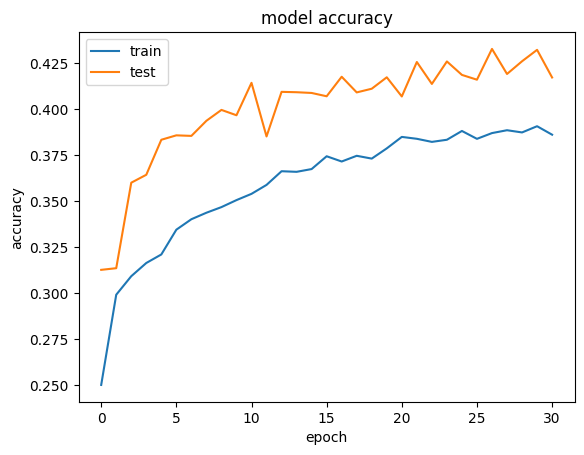

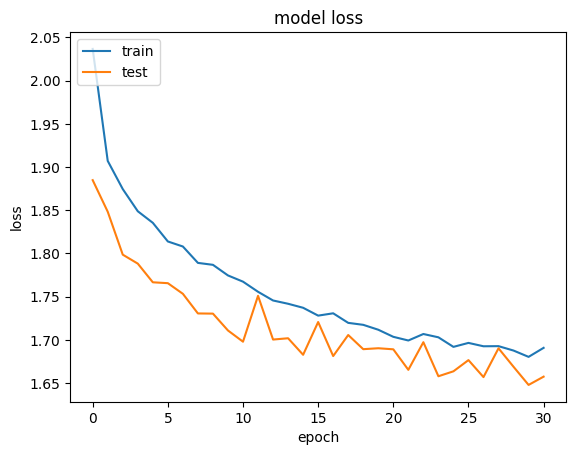

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary

<bound method Model.summary of <Sequential name=sequential_9, built=True>>

In [ ]:
model_4.weights

[<Variable path=sequential_9/dense_layer/kernel, shape=(3072, 512), dtype=float32, value=[[-0.00405447 -0.02966298  0.07575495 ...  0.01099256 -0.00905161
    0.0344958 ]
  [-0.007547   -0.04129006 -0.04638219 ...  0.0229386   0.01683751
    0.01563207]
  [-0.04308937  0.00738527 -0.04783049 ...  0.01422463  0.00516438
    0.0255926 ]
  ...
  [-0.03235    -0.02695283 -0.05956148 ... -0.0361308  -0.03003369
    0.00973133]
  [ 0.0222899   0.03140642 -0.06921557 ... -0.00850671  0.03509096
   -0.02012054]
  [-0.00269505 -0.01132593  0.16288313 ...  0.0219513  -0.00464541
    0.00664253]]>,
 <Variable path=sequential_9/dense_layer/bias, shape=(512,), dtype=float32, value=[-4.1737761e-03 -2.2792653e-03 -3.1772766e-01 -5.8775437e-03
  -5.9967856e-03 -5.9999991e-03 -5.1015168e-03 -4.6995189e-03
  -5.9984177e-03 -2.7821651e-03 -2.6760658e-03 -1.7646573e-03
  -5.9917169e-03 -3.8086758e-03 -3.3825848e-03 -5.9968228e-03
  -2.5481936e-03 -5.9990431e-03 -6.4672395e-03 -1.4018100e-02
  -5.9985695e-

In [ ]:
model_4.get_config()

{'name': 'sequential_9',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 3072),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_9'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kern


###Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(3072,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.2009 - loss: 2.1829 - val_accuracy: 0.2861 - val_loss: 1.9599
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.2710 - loss: 1.9474 - val_accuracy: 0.3178 - val_loss: 1.8799
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.2896 - loss: 1.9035 - val_accuracy: 0.3426 - val_loss: 1.8430
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.3024 - loss: 1.8805 - val_accuracy: 0.3592 - val_loss: 1.8321
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.3130 - loss: 1.8590 - val_accuracy: 0.3559 - val_loss: 1.8125
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.3268 - loss: 1.8355 - val_accuracy: 0.3619 - val_loss: 1.8007
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3253 - loss: 1.8417 - val_accuracy: 0.3557 - val_loss: 1.8102
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.3291 - loss: 1.8214 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


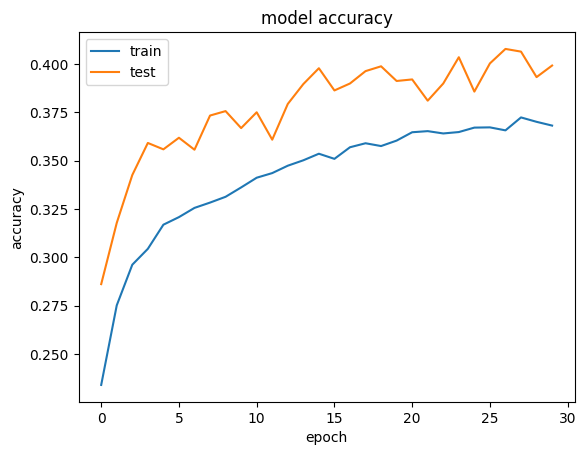

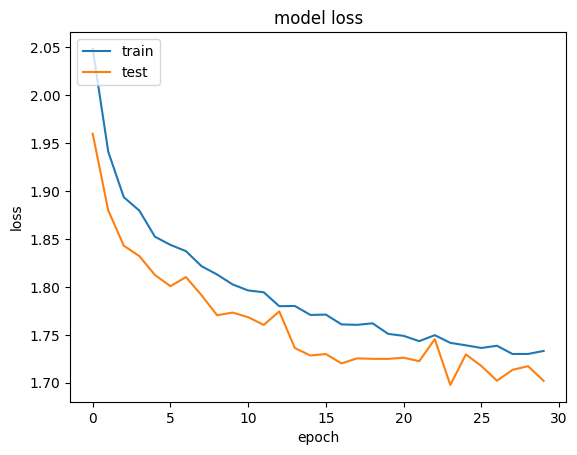

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4212 - loss: 1.6834
Test accuracy: 0.4147999882698059


In [ ]:
model_5.summary

<bound method Model.summary of <Sequential name=sequential_11, built=True>>

In [ ]:
model_5.weights

[<Variable path=sequential_11/dense_layer/kernel, shape=(3072, 512), dtype=float32, value=[[-0.0108911   0.03350297 -0.01405364 ... -0.04445483 -0.01172693
   -0.0007687 ]
  [-0.00025075 -0.01641483  0.0144216  ... -0.0336577   0.00264616
   -0.03895941]
  [ 0.02042903  0.02694887  0.01955743 ... -0.02993049  0.00477712
    0.01665504]
  ...
  [ 0.02105532 -0.00586676  0.02763208 ... -0.02374147  0.01025453
    0.00515121]
  [-0.02815779 -0.02054718  0.02176468 ...  0.03082021 -0.03415529
    0.01514212]
  [-0.02122082 -0.04050757  0.01531872 ... -0.03758142  0.00474092
   -0.00486276]]>,
 <Variable path=sequential_11/dense_layer/bias, shape=(512,), dtype=float32, value=[-5.12082828e-03 -5.00650704e-03 -6.00191997e-03 -7.33996276e-03
  -6.12217560e-03 -5.98288514e-03 -4.54503950e-03 -5.38331224e-03
  -6.54413039e-03 -6.84529357e-03  4.99002188e-02 -6.00406574e-03
  -6.00447692e-03 -9.73172672e-03 -3.04024247e-03 -3.85510945e-03
  -6.00044429e-03 -6.00148086e-03 -9.97115159e-04 -2.03166

In [ ]:
model_5.get_config()

{'name': 'sequential_11',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 3072),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_11'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'ke


###Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(3072,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.2003 - loss: 2.1717 - val_accuracy: 0.2906 - val_loss: 1.9293
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.2637 - loss: 1.9620 - val_accuracy: 0.3242 - val_loss: 1.8779
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.2838 - loss: 1.9268 - val_accuracy: 0.3106 - val_loss: 1.8834
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.2965 - loss: 1.8920 - val_accuracy: 0.3238 - val_loss: 1.8628
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.3065 - loss: 1.8763 - val_accuracy: 0.3424 - val_loss: 1.8077
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.3211 - loss: 1.8524 - val_accuracy: 0.3462 - val_loss: 1.8384
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.3264 - loss: 1.8433 - val_accuracy: 0.3685 - val_loss: 1.7906
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.3309 - loss: 1.8236 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


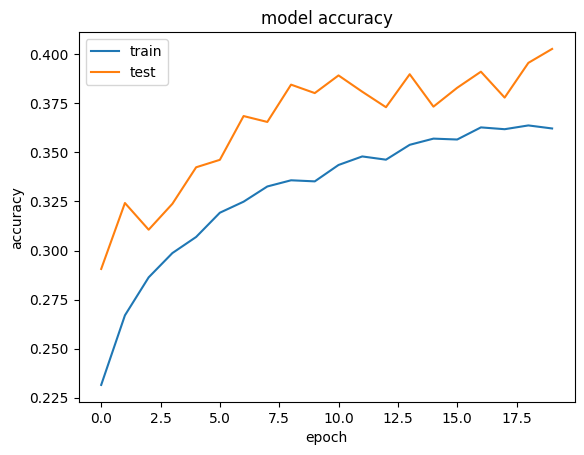

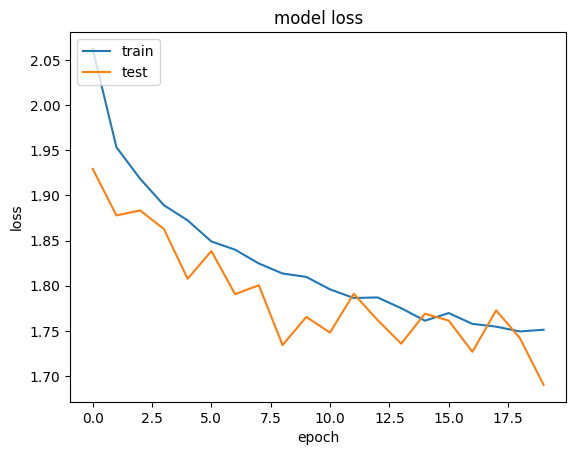

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4046 - loss: 1.6733
Test accuracy: 0.4034000039100647


In [ ]:
model_6.summary

<bound method Model.summary of <Sequential name=sequential_12, built=True>>

In [ ]:
model_6.weights

[<Variable path=sequential_12/dense_layer/kernel, shape=(3072, 512), dtype=float32, value=[[-3.6152191e-02  2.7600700e-02 -2.5437178e-02 ... -1.0254328e-02
   -3.7155289e-02  3.8142659e-02]
  [-1.6488193e-02  3.4703815e-03  2.2192169e-02 ... -1.0063151e-02
   -3.9950807e-02  2.6805669e-03]
  [ 2.7338637e-02 -3.9729342e-02 -4.4470970e-02 ...  1.1261319e-02
   -2.4071824e-02  3.1845793e-03]
  ...
  [-2.6802148e-03  2.8135411e-02  2.6987066e-02 ...  1.7644217e-02
    1.3624558e-02  2.5998782e-02]
  [ 1.3625627e-02 -1.3482323e-02  7.5668627e-03 ... -3.9649785e-02
    2.8417952e-02 -2.1707792e-02]
  [ 2.2518648e-02  6.4787891e-05 -2.3454038e-02 ...  2.2673899e-02
   -4.7481791e-03 -2.8245829e-02]]>,
 <Variable path=sequential_12/dense_layer/bias, shape=(512,), dtype=float32, value=[-6.00188412e-03 -5.99464215e-03 -7.22013135e-03 -6.00164803e-03
  -7.38848839e-03 -6.68338835e-01 -5.62692247e-03 -3.30779562e-03
  -7.79206771e-03 -2.40510819e-03 -6.00276981e-03 -6.00291835e-03
  -6.00230554e-0

In [ ]:
model_6.get_config()

{'name': 'sequential_12',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 3072),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_12'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'ke

###Conclusion: After adding the multiple layers the last layer 6th, the accuracy of the model reached to the  accuracy: 0.4046 - loss: 1.6733  . Also the Analysis of the graphs of the model accuracy and model loss is as follows: Top plot (Model Accuracy):The accuracy improves over epochs for both training and test datasets.Test accuracy is consistently higher than training accuracy, which might indicate good generalization.Bottom plot (Model Loss):The loss decreases over epochs for both training and test datasets, indicating learning progress.Test loss is lower than training loss, which is unusual and might suggest some regularization effects or data augmentation.
